<a href="https://colab.research.google.com/github/ftornay/TFG/blob/master/A/Train_iaps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Entrenamiento de red neuronal con imágenes IAPS

In [ ]:
from fastai.vision import *

In [ ]:
# Activar drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Leemos los datos del disco
iaps_path = Path("/content/drive/MyDrive/IAPS")
# Salen advertencias de fastai
# Las ignoramos
import warnings
warnings.filterwarnings("ignore")
data = load_data(iaps_path, 'iaps_db.pkl').normalize(imagenet_stats)

#Tutorial sobre como entrenar una red convolucional:
https://www.kaggle.com/dipam7/image-regression-using-fastai

Nosotros seguimos el tutorial
Desde data.show_batch
Hasta learn.show_results

ATENCIÓN: Hay que ajustar la tasa de aprendizaje (lr) en función de la gráfica de la gráfica que saca lr_find
La idea es tomar un valor en el que el error (loss) esté claramente bajando
Bastante antes del momento en el que empieza a subir

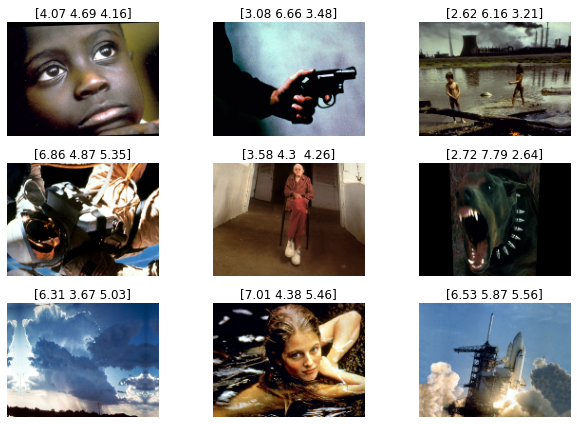

In [ ]:
data.show_batch(3, figsize=(9,6))

In [ ]:
# Red resnet de 34 capas entrenada con la base de datos ImageNet
# para clasificar la categoría a la que pertenecen
learn = cnn_learner(data, models.resnet34)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,time
0,32.352779,#na#,01:04
1,32.384888,#na#,00:16
2,31.916019,#na#,00:16
3,31.602055,#na#,00:16
4,31.330601,#na#,00:16
5,30.457960,#na#,00:16
6,27.715351,#na#,00:16
7,25.028906,#na#,00:16


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


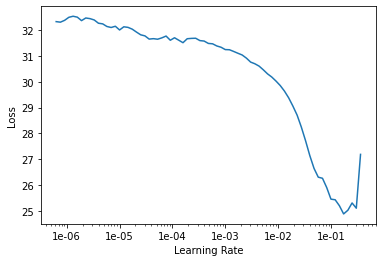

In [ ]:
# Buscamos una tasa de aprendizaje (lr = learning rate) adecuada
# para reentrenar a la red
learn.lr_find()
learn.recorder.plot()

In [ ]:
# Tasa de aprendizaje claramente anterior al punto en que empieza a aumentar el error (loss)
lr = 1e-02

In [ ]:
# Reentrenamos la red, 3 épocas
learn.fit_one_cycle(3, slice(lr))

epoch,train_loss,valid_loss,time
0,29.462944,26.695539,00:36
1,23.556829,11.442633,00:21
2,17.886492,6.893574,00:20


In [ ]:
# Tres más
learn.fit_one_cycle(3, slice(lr))

epoch,train_loss,valid_loss,time
0,6.936046,3.750108,00:20
1,6.388453,3.635805,00:20
2,5.872966,3.179021,00:20


In [ ]:
# Grabamos el modelo
learn.save(iaps_path/'stage_1')

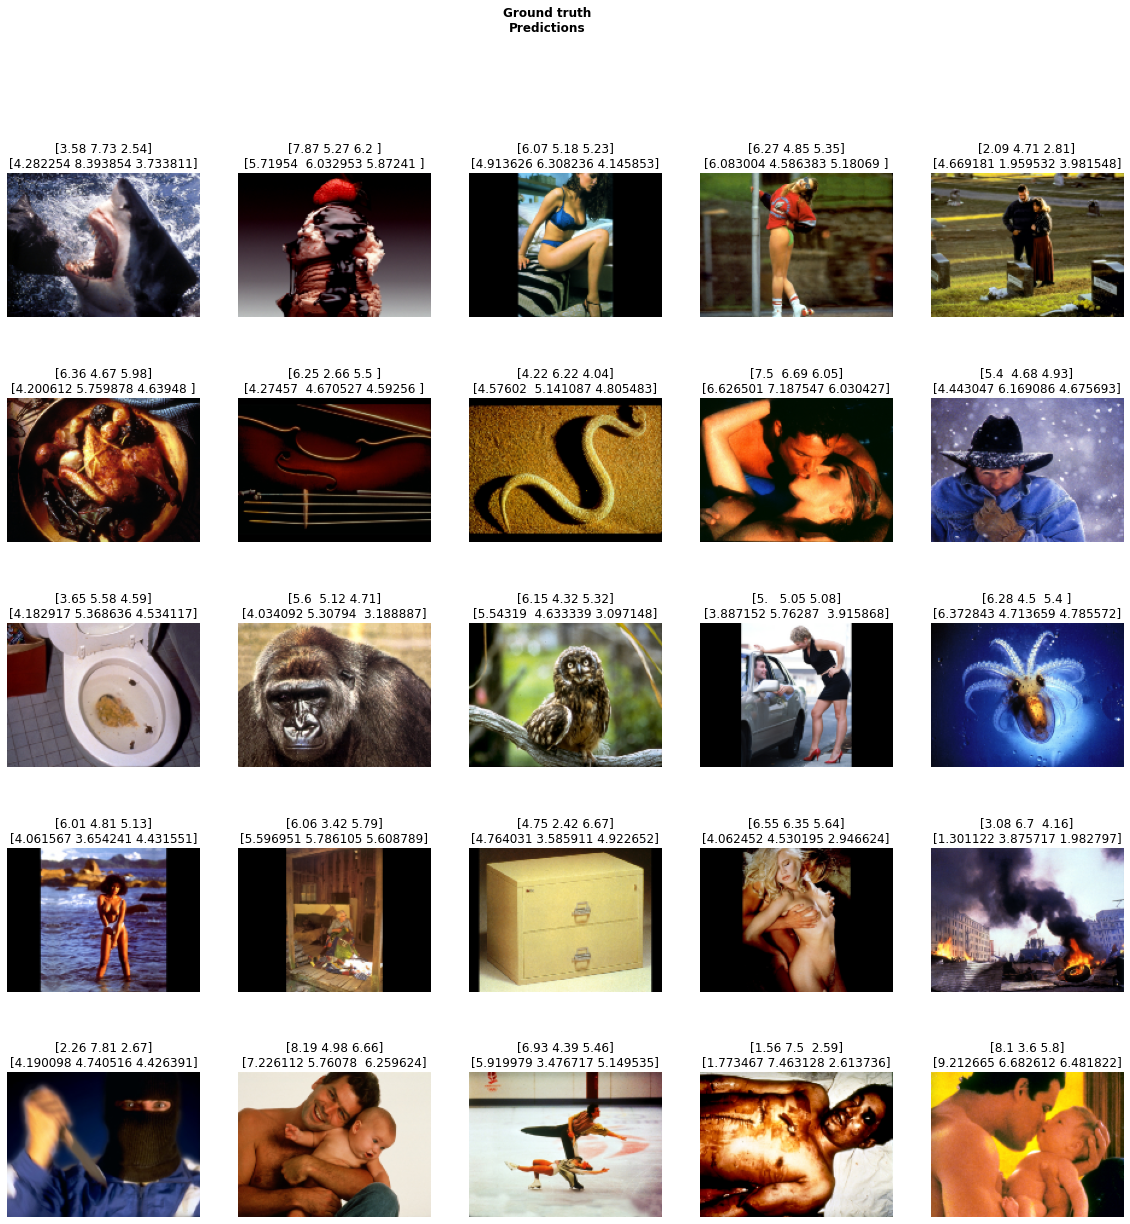

In [ ]:
# Y vemos algunos resultados
learn.show_results()

#Descongelar y seguir entrenando

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(5, max_lr=slice(1e-4,1e-2))

epoch,train_loss,valid_loss,time
0,4.330513,9.610993,00:21
1,4.411703,24.802399,00:21
2,3.981900,4.857512,00:21
3,3.621032,2.371514,00:21
4,3.236599,2.436137,00:21


In [ ]:
learn.save(iaps_path/'stage_2')

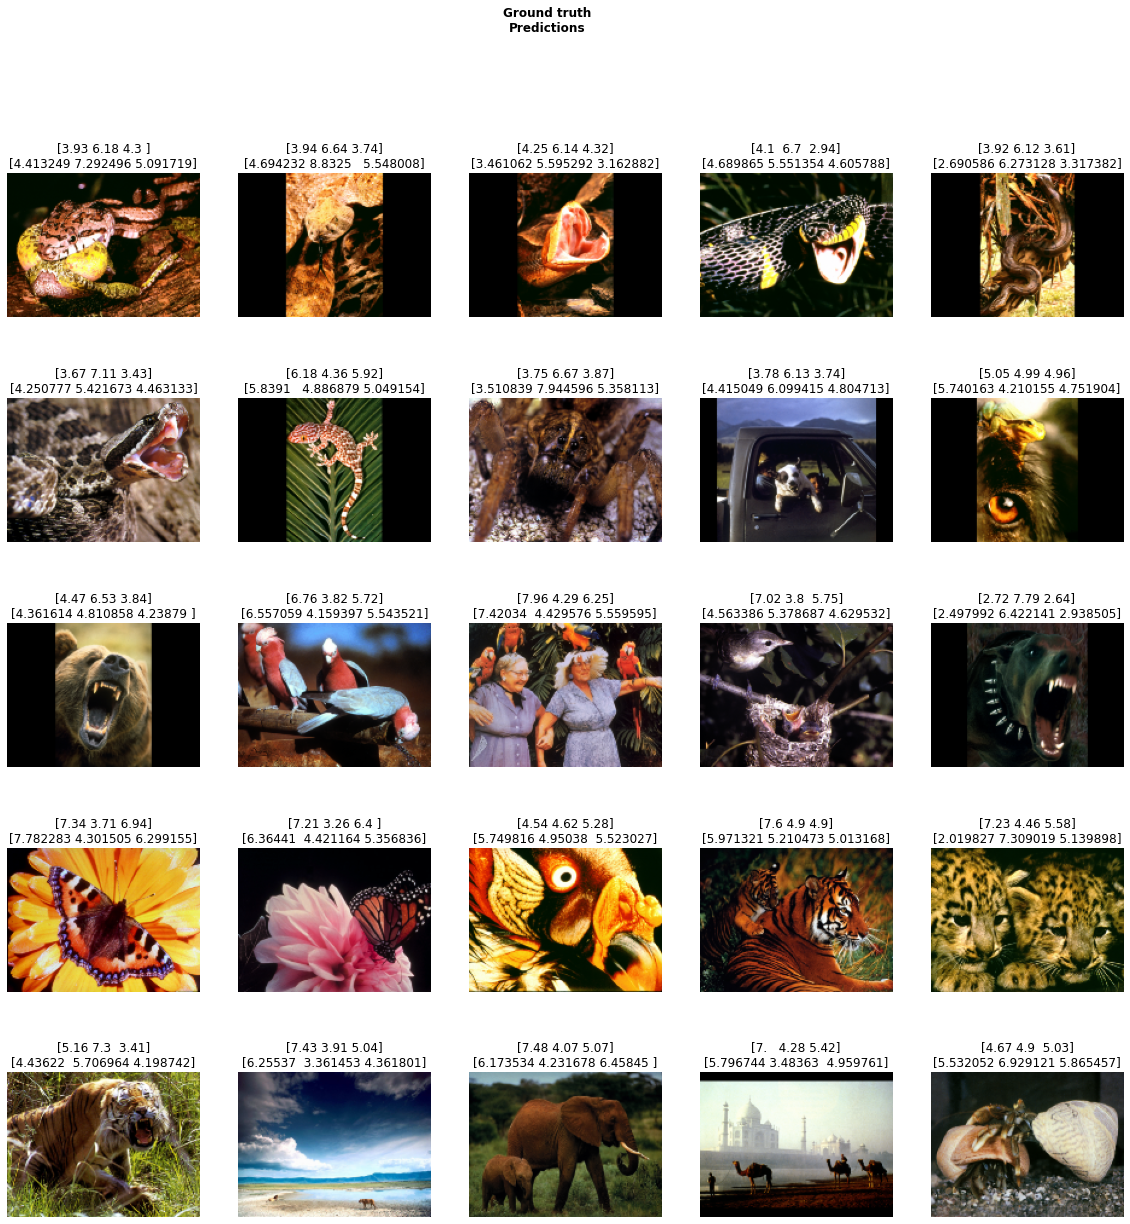

In [ ]:
# 10 filas de resultados
learn.show_results(10)

In [ ]:
# Calculamos rmse finales de entrenamiento y validación
from math import sqrt
sqrt(3.236599), sqrt(2.436137)


(1.7990550297308863, 1.5608129292134916)